### Student Information
Name: 高靖雅/Riley Kao/Ching-Ya Kao

Student ID: 109078501

GitHub ID: chinyakao

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

---

## FIRST - take home exercises in the DM2021-Lab1-master Repo

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### >>> Exercise 1 (5 min):  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [4]:
# Answer here
for t in range(3):
    print(twenty_train.data[t])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [5]:
import pandas as pd

# import helpers function
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also

X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [45]:
# Answer here
# 1. Select only text length larger than 10000 by callable
# 2. Rearrange the columns
# 3. Ramdom 10 rows as a preview
# 4. Sort the randomed by index

X.loc[lambda t: t.text.str.len() > 10000,('category','category_name','text')].sample(10).sort_index()

,category,category_name,text
209,3,soc.religion.christian,From: jhpb@sarto.budd-lake.nj.us (Joseph H. Bu...
400,1,comp.graphics,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...
716,2,sci.med,From: Dan Wallach <dwallach@cs.berkeley.edu> S...
758,2,sci.med,From: bmdelane@midway.uchicago.edu (brian mann...
971,0,alt.atheism,From: mathew <mathew@mantis.co.uk> Subject: Al...
1138,0,alt.atheism,From: jbrown@batman.bmd.trw.com Subject: Re: D...
1411,0,alt.atheism,From: mathew <mathew@mantis.co.uk> Subject: Al...
1596,0,alt.atheism,From: mathew <mathew@mantis.co.uk> Subject: Al...
1666,3,soc.religion.christian,From: dlecoint@garnet.acns.fsu.edu (Darius_Lec...
1890,1,comp.graphics,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...


### >>> Exercise 3 (5 min):
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [46]:
# Answer here
X.loc[lambda t: t.category_name == 'comp.graphics'][::10][0:4]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics


### >>> Exercise 4 (5 min):
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [13]:
# Answer here
# set the axis=1 to calculate in every record
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

### >>> Exercise 5 (take home):
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [47]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [48]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer here**

String of NaN (`'NaN'`), real NaN with column(`np.nan`) and real NaN without column are treated differently by `isnull()`.
- String of NaN actually has the value of three character, N, a, and N.
- Real NaN with column but set by the `numpy.nan` tells the `isnull()` it is real missing value
- Real NaN without column tells the `isnull()` there is nothing in this column and it is real missing value

String of None(`'None'`), real None set by reserved word(`None`) and String of nothing are treated differently by `isnull()`.
- String of None actually has the value of four character, N, o, n, and e.
- Real None set by reserved word(`None`) tells the `isnull()` it is real missing value
- String of nothing actually tells `isnull()` it is a string but no character inside, but it is still a value.

In order to use .isnull effectively, all the strings that represent the meaning of null value (which are 'NaN', 'None', and '') must be replaced as either np.nan or None first.

### >>> Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [62]:
# Answer here
# X dataframe before using .sample()
print("length of data: ", len(X), "\nfirst 4 records:")
X[0:4]

length of data:  2257 
first 4 records:


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian


In [60]:
# random 1st time
X_sample = X.sample(n=1000)
print("length of data: ", len(X_sample), "\nfirst 4 records:")
X_sample[0:4]

length of data:  1000 
first 4 records:


,text,category,category_name
1125,From: grante@aquarius.rosemount.com (Grant Edw...,2,sci.med
765,Organization: University of Maine System From:...,2,sci.med
469,From: revc@garg.campbell.ca.us (Bob Van Cleef)...,3,soc.religion.christian
17,Organization: Penn State University From: <JSN...,0,alt.atheism


In [59]:
# random 2nd time
X_sample = X.sample(n=1000)
print("length of data: ", len(X_sample), "\nfirst 4 records:")
X_sample[0:4]

length of data:  1000 
first 4 records:


,text,category,category_name
450,From: pharvey@quack.kfu.com (Paul Harvey) Subj...,3,soc.religion.christian
2167,From: acooper@mac.cc.macalstr.edu Subject: Re:...,0,alt.atheism
1627,From: millernw@craft.camp.clarkson.edu (Neal M...,1,comp.graphics
1703,From: oved3b@kih.no (Ove Petter Tro) Subject: ...,1,comp.graphics


In [61]:
# X dataframe after using .sample(), no changes
print("length of data: ", len(X), "\nfirst 4 records:")
X[0:4]

length of data:  2257 
first 4 records:


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian


**Answer here**

`.sample()` doesn't change original `X`, and only returns a set of randomly selected records from `X` and store in `X_sample`.
Two times of sampling `X` sampled by `.sample()` select different random records from `X`.  

### >>> Exercise 7 (5 min):
Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

comp.graphics             271
soc.religion.christian    270
sci.med                   259
alt.atheism               200
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

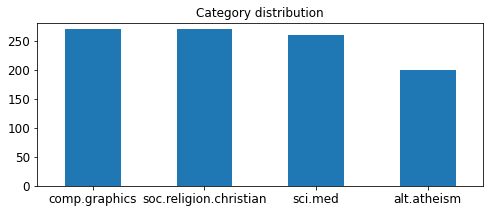

In [65]:
# Answer here

# plot barchart for X_sample
X_sample_counts = X_sample.category_name.value_counts()
print(X_sample_counts)

# plot barchart for X_sample
X_sample_counts.plot(kind = 'bar',
                     title = 'Category distribution',
                     ylim = [0, max(X_sample_counts) + 10], 
                     rot = 0, fontsize = 12, figsize = (8,3))

### >>> Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

![alt txt](https://i.imgur.com/9eO431H.png)

<AxesSubplot:title={'center':'Category distribution'}>

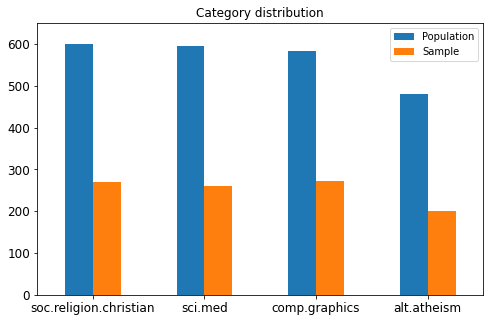

In [74]:
# Answer here
X_sample_counts = X_sample.category_name.value_counts() # X_sample dataset
X_counts = X.category_name.value_counts()               # X dataset

# join 2 datasets into one single dataframe
X_join = pd.DataFrame({ "Population": X_counts, "Sample": X_sample_counts}, index=categories).sort_index(ascending=False)
X_join.plot(kind = 'bar', title = 'Category distribution', ylim = [0, 650], 
            rot = 0, fontsize = 12, figsize = (8,5))

In [207]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

### >>> Exercise 9 (5 min):
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [91]:
# Answer here
analyze(X.iloc[0]['text'])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### >>> Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [92]:
# Answer here
# get fifth record, convert to 1-row 2D-array, and flatten into 1D-array
fifth_record = X_counts[4, 0:100].toarray().flatten() 
# get feature names
terms_array = np.array(count_vect.get_feature_names()[0:100]) 

# joining counts and feature names into one dataframe
join_df = pd.DataFrame({"term":terms_array, "count_num":fifth_record}) 
# show the exist terms and the second term is the answer
join_df.loc[lambda t: t.count_num >= 1]

,term,count_num
0,00,1
37,01,1


### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

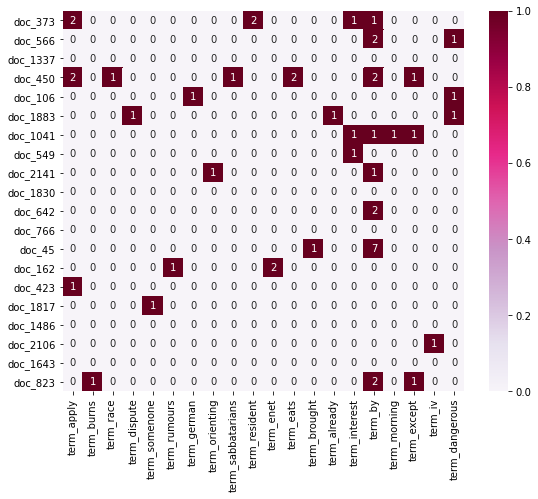

In [155]:
# Answer here
import seaborn as sns
from random import sample # for sample a list

# make a new sample of X and count vectorizer the new sample
sample_X = X.sample(n=20) 
sample_count_vect = CountVectorizer()
sample_X_counts = sample_count_vect.fit_transform(sample_X.text)

# sample 20 terms from this sample_X
term_array = np.array(sample_count_vect.get_feature_names()) # convert terms to an array
sample_index = sample(range(0,len(term_array)), 20)          # get 20 sample index from array length
sample_term = list(term_array[sample_index])                 # get the 20 sample terms by sampled index

# define the xyz of the heat map
plot_x = ["term_"+str(i) for i in sample_term]
plot_y = ["doc_"+ str(i) for i in list(sample_X.index)]
plot_z = sample_X_counts[:, sample_index].toarray()          # only get the 20 sample index's counts

# draw the heat map
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

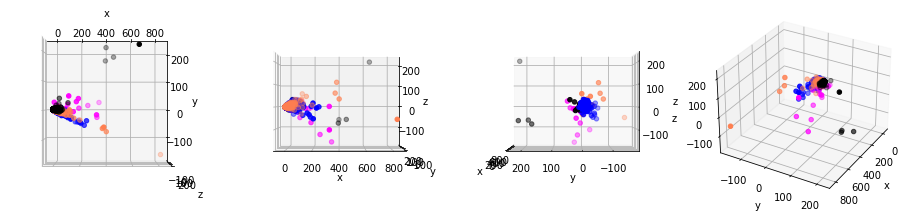

In [196]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'magenta']

# plot
fig = plt.figure(figsize = (16,6))

# function for generating side-by-side 3D plots
# ref: https://stackoverflow.com/questions/35492954/side-by-side-identical-axes3d-with-different-orientation
def makeplotX(posit,elev,azim):
    ax = fig.add_subplot(posit,projection='3d')
    
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')
            
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev, azim)
    return ax 

ax1 = makeplotX(141,90,270) # camera on x-y
ax2 = makeplotX(142,0,270)  # camera on x-z
ax3 = makeplotX(143,0,180)  # camera on y-z
ax4 = makeplotX(144,30,30)  # camera on 3D angle overview x-y-z

plt.show()

**Answer here**

In first three plots, trying to see the scatter plots in two axis is easier for human recognize the difference. The last plot(right hand side) provide us an overview of this 3D plot. In PCA3, no matter what angle we look at, the blue points are more closer to each other than PCA2. As for black points, there are outliers far away from others in PCA3. It is same situation with PCA2. We can see points of the distances clearer than PCA2 plot through different color, different angle and different position.

### >>> Exercise 13 (take home) & Exercise 14 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [212]:
# Exercise 14 Answer here
# Limit the max number of terms
limit_count_vect = CountVectorizer(max_features=200)
limit_X_counts = limit_count_vect.fit_transform(X.text)

# Limit max number of terms to count so that this part doesn't takes that much time to compute frequencies. 
term_frequencies = []
for j in range(0,limit_X_counts.shape[1]):
    term_frequencies.append(sum(limit_X_counts[:,j].toarray()))
term_frequencies = np.asarray(limit_X_counts.sum(axis=0))[0]

In [229]:
# Exercise 13 Answer here
import plotly.graph_objs as go
import plotly.offline as pof

# set offline
pof.init_notebook_mode(connected = True)

# set graph data
data = [go.Bar(x=np.array(limit_count_vect.get_feature_names()), y=term_frequencies)]

# add a graph title and x-axis is categorical data
layout = go.Layout(title='Word Frequency', xaxis=dict(type='category'))  

# combine data and layout
fig = go.Figure(data=data, layout=layout)

# plot the figure
# provide a link so that you can access the interactive plot on plotly website
pof.iplot(fig, show_link = True, link_text = "Word Frequency Plotly Links")

### >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [223]:
# combine term and frequency into a dataframe for sorting
comb_df = pd.DataFrame({"term":list(limit_count_vect.get_feature_names()),
                        "freq":list(term_frequencies)}).sort_values(by=['freq'], ascending=False)
comb_df

,term,freq
151,the,29825
109,of,17660
165,to,17222
8,and,13017
81,is,12343
...,...,...
163,through,371
46,doesn,369
39,course,366
12,anything,366


In [231]:
# offline interactive bar plot
data = [go.Bar(x=comb_df['term'],y=comb_df['freq'])]
layout = go.Layout(title="Sorted Word Frequency", xaxis=dict(type='category'))
fig = go.Figure(data=data, layout=layout)

# plot the figure
# provide a link so that you can access the interactive plot on plotly website
pof.iplot(fig, show_link = True, link_text = "Sorted Word Frequency Plotly Links")

### >>> Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [233]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:10] # Yes, it works!

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[From, :, libman, @, hsc.usc.edu, (, Marlena, ...","[0, 0, 1, 0]"


---

## SECOND -  follow the same process from the DM2021-Lab1-master Repo on the new dataset. 

### 1. Data Source

### 2. Data Preparation

### 3. Data Transformation

#### 3.1 Converting Dictionary into Pandas dataframe

#### 3.2 Familiarizing yourself with the Data

### 4. Data Mining using Pandas

#### 4.1 Dealing with Missing Values

#### 4.2 Dealing with Duplicate Data

### 5. Data Preprocessing

#### 5.1 Sampling

#### 5.2 Feature Creation

#### 5.3 Feature Subset Selection

#### 5.4 Dimensionality Reduction

#### 5.5 Atrribute Transformation / Aggregation

#### 5.6 Discretization and Binarization

### 6. Data Exploration

---

## THIRD - please attempt the following tasks on the new dataset.

---

## FOURTH - How can you improve the Data preprocessing for these specific datasets?

---

###### END of Lab1